2023-02-22 19:20:45.271497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 225 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


2023-02-22 19:20:47.423470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
13/13 [==============================] - 10s 731ms/step - loss: 2.0695 - acc: 0.3692 - val_loss: 1.0876 - val_acc: 0.4800
Epoch 2/5
13/13 [==============================] - 9s 696ms/step - loss: 0.9588 - acc: 0.5333 - val_loss: 0.6219 - val_acc: 0.8000
Epoch 3/5
13/13 [==============================] - 9s 700ms/step - loss: 0.3998 - acc: 0.8667 - val_loss: 0.4622 - val_acc: 0.8267
Epoch 4/5
13/13 [==============================] - 9s 699ms/step - loss: 0.1788 - acc: 0.9385 - val_loss: 0.3797 - val_acc: 0.8400
Epoch 5/5
13/13 [==============================] - 9s 707ms/step - loss: 0.2471 - acc: 0.9231 - val_loss: 0.4985 - val_acc: 0.8000


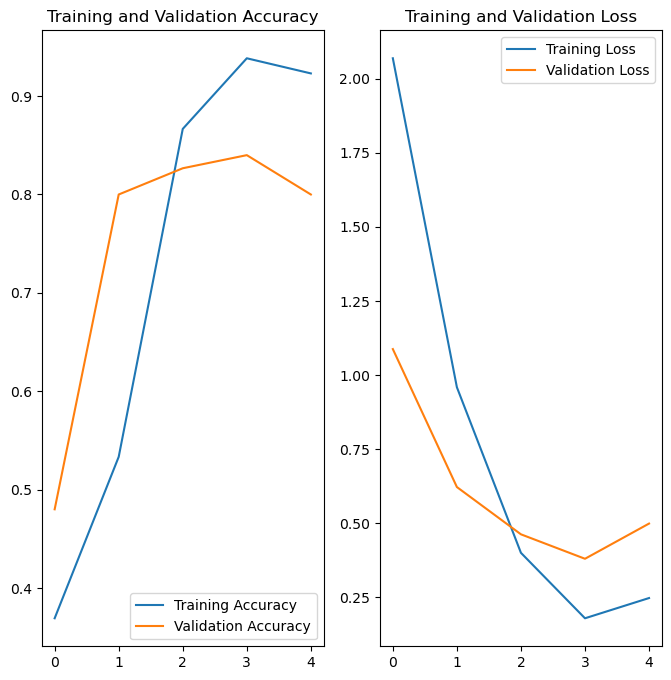

Training Accuracy:
0.9230769276618958
Testing Accuracy:
0.800000011920929


(None, None)

In [1]:
import os        
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import backend as K

from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.models import load_model
 
img_width, img_height = 224, 224
nb_train_samples =210
nb_validation_samples = 90
epochs = 10
batch_size = 16


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
    
# Defines & compiles the model
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
tf.keras.layers.MaxPooling2D(2, 2),
keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
keras.layers.Dropout(rate=0.1),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
keras.layers.Dropout(rate=0.10),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),

# 3 output neuron for the 3 classes of Animal Images
tf.keras.layers.Dense(3, activation='softmax')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])
        

# Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#splits data into training and testing(validation) sets
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
import matplotlib.pyplot as plt

   
#training data
train_generator = train_datagen.flow_from_directory(
        '/Users/poojahiregoudar/desktop/pooja/project/classification/Furniture',  # Source directory
        target_size=(img_width, img_height),  # Resizes images
        batch_size=15,
        class_mode='categorical',subset = 'training')
    

epochs = 5
#Testing data
validation_generator = train_datagen.flow_from_directory(
'/Users/poojahiregoudar/desktop/pooja/project/classification/Furniture',
target_size=(img_width, img_height),
batch_size=15,
class_mode='categorical',
subset='validation') # set as validation data
       
#Model fitting for a number of epochs
history = model.fit(
train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs=epochs,
validation_data = validation_generator,
validation_steps = nb_validation_samples // batch_size,
verbose=1)
    
        
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

#This code is used to plot the training and validation accuracy
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
 
# returns accuracy of training
print("Training Accuracy:"), print(history.history['acc'][-1])
print("Testing Accuracy:"), print (history.history['val_acc'][-1])

    

In [19]:
##model = load_model('/Users/poojahiregoudar/desktop/pooja/project/classification/model_saved.h5')
# new_model = tf.keras.models.load_model('/Users/poojahiregoudar/desktop/pooja/project/classification/model_saved.h5')
image = load_img('/Users/poojahiregoudar/desktop/pooja/project/classification/Furniture/Bed/Aiden Velvet Bed.jpg', target_size=(224, 224))
# i = load_img(img_path, target_size=(224,224))
img = np.array(image)
img = np.expand_dims(img, axis=0)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
output = {'Bed': label[0][0], 'Chair': label[0][1],'Sofa':label[0][2]}


1/1 [==============================] - 0s 208ms/step


In [8]:
model.save('final_model.h5')

In [20]:
output

{'Bed': 0.008276523, 'Chair': 0.96416384, 'Sofa': 0.027559623}